In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import optim
from torch.utils.data import DataLoader

from torchvision.transforms import transforms
import torchvision.datasets as datasets

from models import U_Net_big
from RectifiedFlow import RectifiedFlow_Unet, train

from util import load_FashionMNIST, show_samples, show_trajectories

In [2]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(device)

cuda


In [3]:
batch_size = 512
train_dataset, test_dataset, train_dataloader, test_dataloader, classes = load_FashionMNIST(batch_size)
input_shape = (batch_size, 2, 32, 32)

def get_samples(shape, device):
    return torch.randn(shape, device=device)

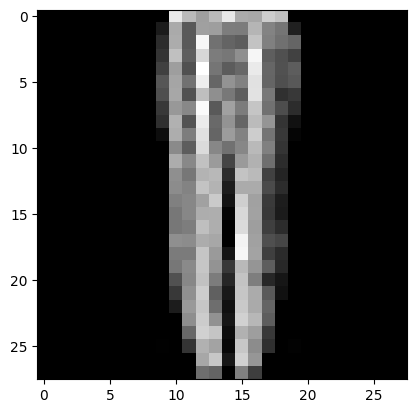

In [30]:
plt.imshow(train_dataset.data[3996], cmap="gray")

In [4]:
v_model_1 = U_Net_big(input_shape=input_shape, output_channels=1, device=device)
rectified_flow_1 = RectifiedFlow_Unet(v_model_1, device)

In [5]:
optimizer_1 = torch.optim.Adam(rectified_flow_1.v_model.parameters(), lr=10e-3, weight_decay=10e-5)
scheduler_1 = None #optim.lr_scheduler.ReduceLROnPlateau(optimizer_1, factor=0.9, patience=120, verbose=True)

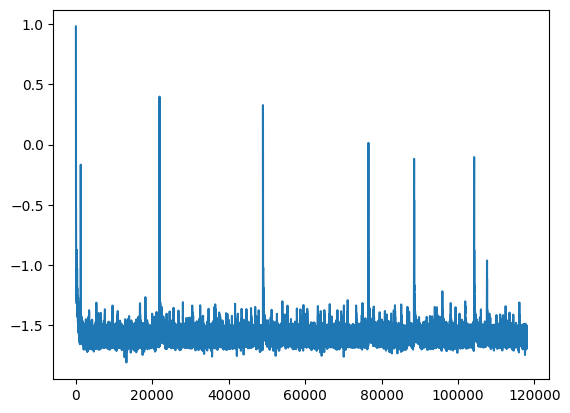

In [6]:
rectified_flow_1 = train(rectified_flow_1, False, optimizer_1, scheduler_1, train_dataloader, get_samples, device, epochs=1000, noise_factor=0.01)
plt.plot(np.log(rectified_flow_1.loss_curve))
plt.show()

In [7]:
torch.save(rectified_flow_1, "./models/FashionMNIST/fashionMNIST.pth")

In [4]:
rectified_flow_1 = torch.load("./models/FashionMNIST/fashionMNIST.pth")

In [16]:
def get_samples(shape, device):
    return torch.randn(shape, device=device) * 0.8

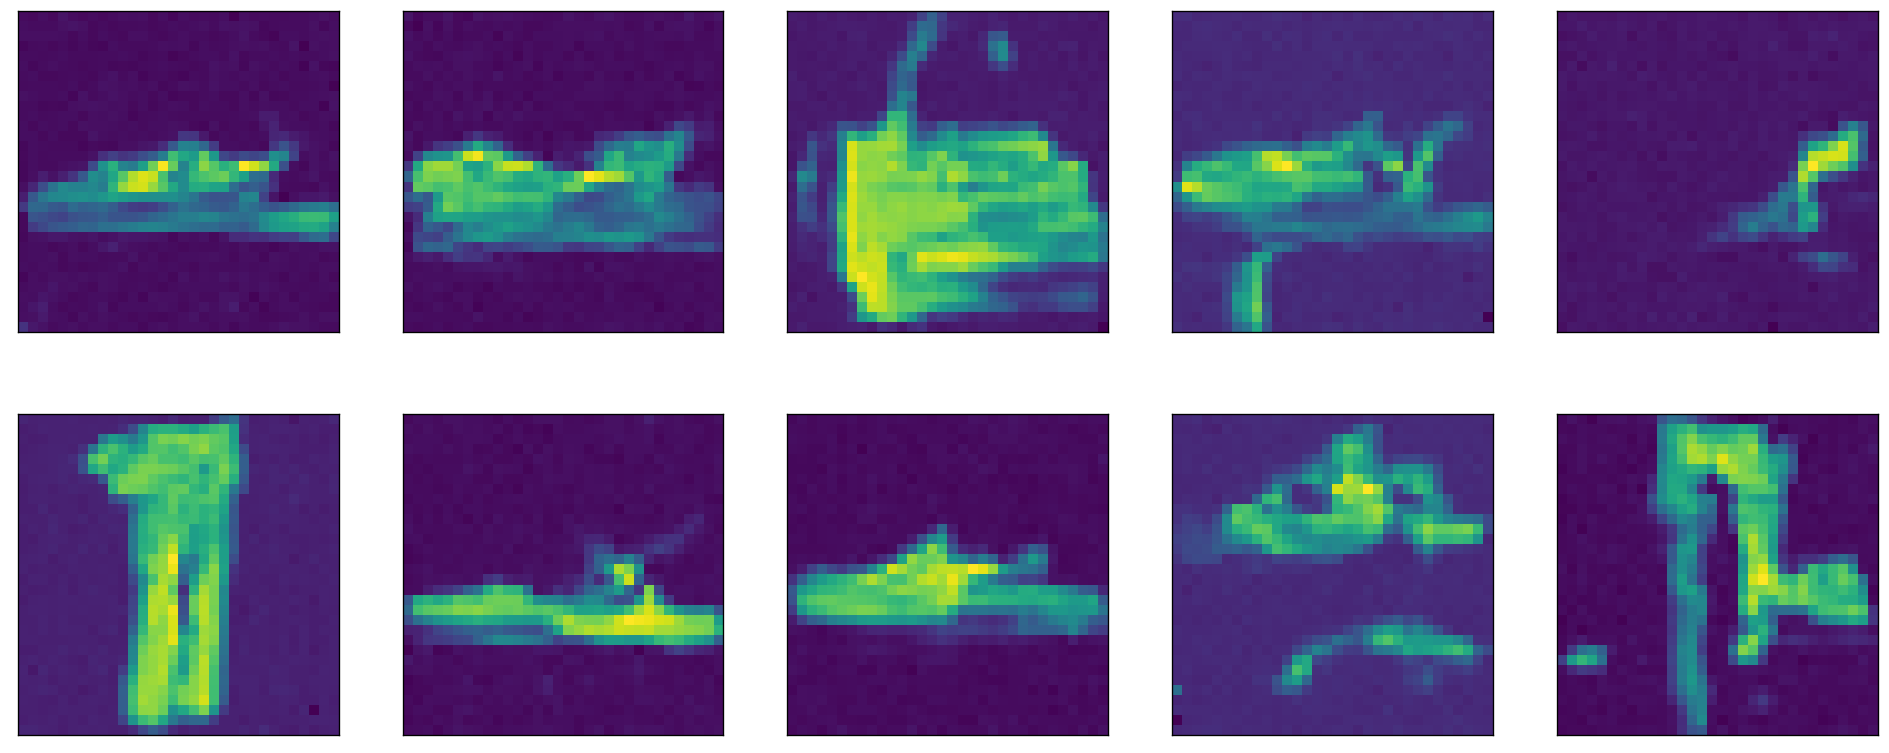

In [9]:
show_samples(rectified_flow_1, get_samples, columns=5, rows=2, channels=1, img_size=32, num_steps=100, device=device)

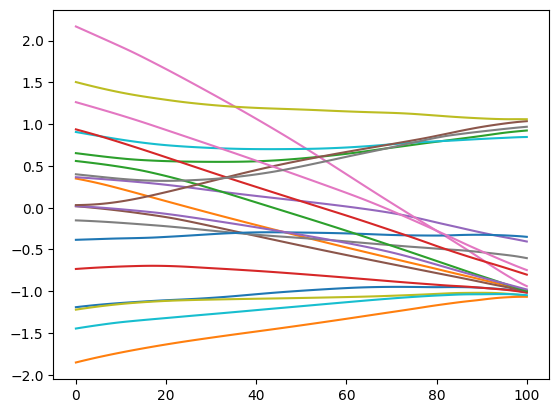

In [6]:
show_trajectories(rectified_flow_1, get_samples, img_size=32, num_steps=100, device=device)